In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, GridSearchCV

In [3]:
df = pd.read_excel('task_steel_factory.xlsx')

# EDA

In [4]:
# Names in Russian, but this isn't stop us
df

,ID,Name,Profession,Rank,Equipment,Hazard_class,Month,Hours_worked,Production,Salary
0,1,Журавлев Б. И.,Cleaner,2,Auxiliary_Rooms,1.0,2022-01-01,180,1950,NaN
1,2,Степанов А. М.,Cleaner,2,Auxiliary_Rooms,1.0,2022-01-01,228,1950,NaN
2,3,Федотов М. М.,Cleaner,2,Auxiliary_Rooms,1.0,2022-01-01,252,1950,NaN
3,4,Абрамов Е. Д.,Cleaner,2,Pilgrim_Camps,3.3,2022-01-01,240,1950,NaN
4,5,Волков Д. М.,Roller_assistant,2,Pilgrim_Camps,3.3,2022-01-01,252,1950,NaN
...,...,...,...,...,...,...,...,...,...,...
2395,2396,Румянцев М. А.,Roller_Cutter,8,Pilgrim_Camps,3.3,2022-12-01,180,1500,NaN
2396,2397,Верещагин Я. А.,Roller_Cutter,8,Sewing_Mill,3.3,2022-12-01,180,1500,NaN
2397,2398,Власов С. Д.,Roller_Cutter,8,Sewing_Mill,3.3,2022-12-01,156,1500,NaN
2398,2399,Волков А. А.,Roller_Cutter,8,Sewing_Mill,3.3,2022-12-01,192,1500,NaN


In [5]:
# NaN only in salary
df.isna().sum()

ID                0
Name              0
Profession        0
Rank              0
Equipment         0
Hazard_class      0
Month             0
Hours_worked      0
Production        0
Salary          849
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            2400 non-null   int64         
 1   Name          2400 non-null   object        
 2   Profession    2400 non-null   object        
 3   Rank          2400 non-null   int64         
 4   Equipment     2400 non-null   object        
 5   Hazard_class  2400 non-null   float64       
 6   Month         2400 non-null   datetime64[ns]
 7   Hours_worked  2400 non-null   int64         
 8   Production    2400 non-null   int64         
 9   Salary        1551 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 187.6+ KB


In [7]:
df.describe()

,ID,Rank,Hazard_class,Hours_worked,Production,Salary
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,1551.000000
mean,1200.500000,4.900000,2.934000,192.400000,1595.833333,30211.722108
std,692.964646,1.676655,0.757881,46.512164,344.853385,12719.975479
min,1.000000,2.000000,1.000000,72.000000,890.000000,8534.020000
25%,600.750000,4.000000,3.175000,168.000000,1452.500000,20821.740000
50%,1200.500000,5.000000,3.300000,192.000000,1560.000000,27207.670000
75%,1800.250000,6.000000,3.325000,216.000000,1825.000000,37477.220000
max,2400.000000,8.000000,3.400000,348.000000,2250.000000,76519.860000


In [8]:
# In this list only 200 Names on 12 month
df.nunique()

ID              2400
Name             200
Profession         9
Rank               7
Equipment          9
Hazard_class       6
Month             12
Hours_worked      24
Production        12
Salary           593
dtype: int64

In [9]:
df['Profession'].value_counts()

Roller_Cutter               612
Metal_Heater                504
Roller_assistant            360
Control_post_Operator       324
Cleaner                     252
Quality_Controller          108
Metal_HeaterMetal_Loader     96
Hot_Metal_Cutter             84
Refractor                    60
Name: Profession, dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='Profession'>

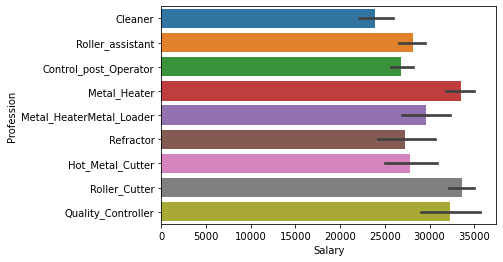

In [10]:
sns.barplot(x = df['Salary'], y = df['Profession'])

In [11]:
df['Equipment'].value_counts()

Pilgrim_Camps                             708
Heating_Furnaces                          456
Calibration_Mill                          372
Sewing_Mill                               372
Auxiliary_Rooms                           108
Heating_Furnaces, Heating                 108
Control_And_Measuring_Equipment           108
Heating_Furnaces, canting                  96
Calibration_Mill, Hydraulic_Fracturing     72
Name: Equipment, dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='Equipment'>

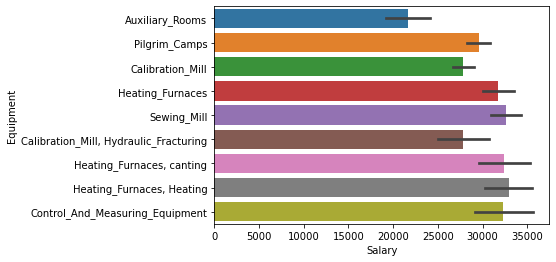

In [12]:
sns.barplot(x = df['Salary'], y = df['Equipment'])

In [13]:
# With the same profession, you can work on different equipment
df.groupby('Profession')['Equipment'].nunique()

Profession
Cleaner                     2
Control_post_Operator       2
Hot_Metal_Cutter            1
Metal_Heater                3
Metal_HeaterMetal_Loader    1
Quality_Controller          1
Refractor                   1
Roller_Cutter               3
Roller_assistant            2
Name: Equipment, dtype: int64

In [14]:
# Rank starts with 2
df['Rank'].value_counts()

4    672
5    624
7    348
3    228
8    216
2    192
6    120
Name: Rank, dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='Rank'>

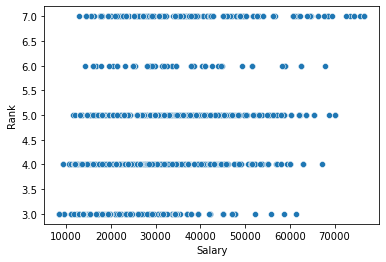

In [15]:
sns.scatterplot(x = df['Salary'], y = df['Rank'])

In [16]:
# Most of the staff work in places with high hazard
df['Hazard_class'].value_counts()

3.3    1116
3.4     600
2.0     324
1.0     216
3.2      84
3.1      60
Name: Hazard_class, dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='Hazard_class'>

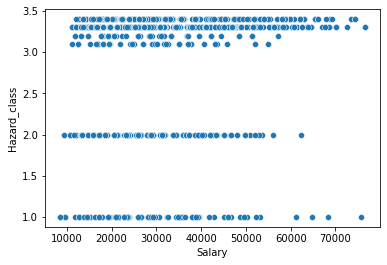

In [17]:
sns.scatterplot(x = df['Salary'], y = df['Hazard_class'])

# Data transform

In [18]:
df = pd.get_dummies(data = df, columns = ['Profession', 'Equipment'])

In [19]:
df

,ID,Name,Rank,Hazard_class,Month,Hours_worked,Production,Salary,Profession_Cleaner,Profession_Control_post_Operator,...,Profession_Roller_assistant,Equipment_Auxiliary_Rooms,Equipment_Calibration_Mill,"Equipment_Calibration_Mill, Hydraulic_Fracturing",Equipment_Control_And_Measuring_Equipment,Equipment_Heating_Furnaces,"Equipment_Heating_Furnaces, Heating","Equipment_Heating_Furnaces, canting",Equipment_Pilgrim_Camps,Equipment_Sewing_Mill
0,1,Журавлев Б. И.,2,1.0,2022-01-01,180,1950,NaN,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2,Степанов А. М.,2,1.0,2022-01-01,228,1950,NaN,1,0,...,0,1,0,0,0,0,0,0,0,0
2,3,Федотов М. М.,2,1.0,2022-01-01,252,1950,NaN,1,0,...,0,1,0,0,0,0,0,0,0,0
3,4,Абрамов Е. Д.,2,3.3,2022-01-01,240,1950,NaN,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5,Волков Д. М.,2,3.3,2022-01-01,252,1950,NaN,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,Румянцев М. А.,8,3.3,2022-12-01,180,1500,NaN,0,0,...,0,0,0,0,0,0,0,0,1,0
2396,2397,Верещагин Я. А.,8,3.3,2022-12-01,180,1500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
2397,2398,Власов С. Д.,8,3.3,2022-12-01,156,1500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
2398,2399,Волков А. А.,8,3.3,2022-12-01,192,1500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
df['Month'].agg([min, max])

min   2022-01-01
max   2022-12-01
Name: Month, dtype: datetime64[ns]

In [21]:
df['Month'] = df['Month'].dt.month

In [22]:
df['Hours_worked'].value_counts()

192    300
180    266
168    259
204    223
216    190
228    175
156    173
240    117
144    116
108     94
252     87
264     76
132     69
120     59
276     50
96      48
288     42
300     28
312      9
324      8
84       6
336      3
348      1
72       1
Name: Hours_worked, dtype: int64

d:\anac\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Hours_worked'>

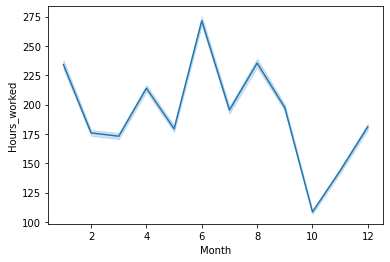

In [23]:
sns.lineplot(df['Month'], df['Hours_worked'])

In [24]:
df['Production'].value_counts()

1950    200
1460    200
1430    200
1790    200
1490    200
2250    200
1620    200
1930    200
1640    200
890     200
1200    200
1500    200
Name: Production, dtype: int64

d:\anac\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Production'>

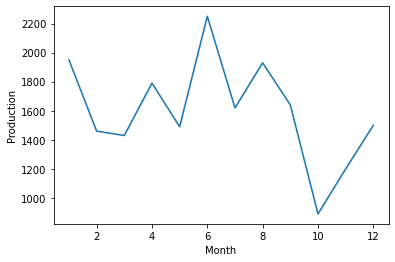

In [25]:
sns.lineplot(df['Month'], df['Production'])

As we can see, the lineplot of production volume and hours worked matches, therefore, we will not consider the volume of production as a separate feature (looking ahead, I will say that the volume of production gave too much weight for the linear regression model, which spoiled the picture as a whole). Employees who are on a salary receive allowances due to overwork. Next, we take 168 hours for the norm of hours to calculate the overwork.

In [26]:
df['month_norm'] = 168

In [27]:
df['overwork'] = np.where(df['Hours_worked'] > df['month_norm'],
                                   df['Hours_worked'] - df['month_norm'], 0)
df['not_overwork'] = np.where(df['Hours_worked'] < df['month_norm'],
                                   df['month_norm'] - df['Hours_worked'], 0)

In [28]:
# make a separate dataframe with empty salary values
test_df = df[df['Salary'].isnull()]

In [29]:
test_df = test_df.dropna(axis = 1)

In [30]:
test_df

,ID,Name,Rank,Hazard_class,Month,Hours_worked,Production,Profession_Cleaner,Profession_Control_post_Operator,Profession_Hot_Metal_Cutter,...,"Equipment_Calibration_Mill, Hydraulic_Fracturing",Equipment_Control_And_Measuring_Equipment,Equipment_Heating_Furnaces,"Equipment_Heating_Furnaces, Heating","Equipment_Heating_Furnaces, canting",Equipment_Pilgrim_Camps,Equipment_Sewing_Mill,month_norm,overwork,not_overwork
0,1,Журавлев Б. И.,2,1.0,1,180,1950,1,0,0,...,0,0,0,0,0,0,0,168,12,0
1,2,Степанов А. М.,2,1.0,1,228,1950,1,0,0,...,0,0,0,0,0,0,0,168,60,0
2,3,Федотов М. М.,2,1.0,1,252,1950,1,0,0,...,0,0,0,0,0,0,0,168,84,0
3,4,Абрамов Е. Д.,2,3.3,1,240,1950,1,0,0,...,0,0,0,0,0,1,0,168,72,0
4,5,Волков Д. М.,2,3.3,1,252,1950,0,0,0,...,0,0,0,0,0,1,0,168,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,Румянцев М. А.,8,3.3,12,180,1500,0,0,0,...,0,0,0,0,0,1,0,168,12,0
2396,2397,Верещагин Я. А.,8,3.3,12,180,1500,0,0,0,...,0,0,0,0,0,0,1,168,12,0
2397,2398,Власов С. Д.,8,3.3,12,156,1500,0,0,0,...,0,0,0,0,0,0,1,168,0,12
2398,2399,Волков А. А.,8,3.3,12,192,1500,0,0,0,...,0,0,0,0,0,0,1,168,24,0


In [31]:
# Delete lines with missing values from the original dataframe
# Based on this dataframe, we will train the model
df = df.dropna(axis = 0)

In [32]:
df

,ID,Name,Rank,Hazard_class,Month,Hours_worked,Production,Salary,Profession_Cleaner,Profession_Control_post_Operator,...,"Equipment_Calibration_Mill, Hydraulic_Fracturing",Equipment_Control_And_Measuring_Equipment,Equipment_Heating_Furnaces,"Equipment_Heating_Furnaces, Heating","Equipment_Heating_Furnaces, canting",Equipment_Pilgrim_Camps,Equipment_Sewing_Mill,month_norm,overwork,not_overwork
16,17,Григорьев А. Т.,3,1.0,1,228,1950,28217.32,1,0,...,0,0,0,0,0,0,0,168,60,0
17,18,Клюев Д. М.,3,1.0,1,240,1950,30488.47,1,0,...,0,0,0,0,0,0,0,168,72,0
18,19,Кондратьев Д. Д.,3,1.0,1,216,1950,25946.17,1,0,...,0,0,0,0,0,0,0,168,48,0
20,21,Наумов О. В.,3,1.0,1,240,1950,30488.47,1,0,...,0,0,0,0,0,0,0,168,72,0
21,22,Чернышев Д. В.,3,1.0,1,228,1950,28217.32,1,0,...,0,0,0,0,0,0,0,168,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2377,Курочкин В. М.,7,3.3,12,180,1500,30770.48,0,0,...,0,0,0,0,0,0,1,168,12,0
2377,2378,Наумов Д. Г.,7,3.3,12,204,1500,37896.10,0,0,...,0,0,0,0,0,0,1,168,36,0
2378,2379,Попов Е. Ю.,7,3.3,12,180,1500,30770.48,0,0,...,0,0,0,0,0,0,1,168,12,0
2380,2381,Серебряков А. А.,7,3.3,12,192,1500,34333.29,0,0,...,0,0,0,0,0,0,1,168,24,0


In [33]:
df.columns

Index(['ID', 'Name', 'Rank', 'Hazard_class', 'Month', 'Hours_worked',
       'Production', 'Salary', 'Profession_Cleaner',
       'Profession_Control_post_Operator', 'Profession_Hot_Metal_Cutter',
       'Profession_Metal_Heater', 'Profession_Metal_HeaterMetal_Loader',
       'Profession_Quality_Controller', 'Profession_Refractor',
       'Profession_Roller_Cutter', 'Profession_Roller_assistant',
       'Equipment_Auxiliary_Rooms', 'Equipment_Calibration_Mill',
       'Equipment_Calibration_Mill, Hydraulic_Fracturing',
       'Equipment_Control_And_Measuring_Equipment',
       'Equipment_Heating_Furnaces', 'Equipment_Heating_Furnaces, Heating',
       'Equipment_Heating_Furnaces, canting', 'Equipment_Pilgrim_Camps',
       'Equipment_Sewing_Mill', 'month_norm', 'overwork', 'not_overwork'],
      dtype='object')

# Modeling

In [34]:
# ID, Name and month will not contribute to the final formula, we discard them
# Instead of the hours worked, we will use the overworking/not_overworking of the hours
# # We also discard the volume of production (more on this above)
X = [ 'Rank', 'Hazard_class', 'Profession_Cleaner',
       'Profession_Control_post_Operator', 'Profession_Hot_Metal_Cutter',
       'Profession_Metal_Heater', 'Profession_Metal_HeaterMetal_Loader',
       'Profession_Quality_Controller', 'Profession_Refractor',
       'Profession_Roller_Cutter', 'Profession_Roller_assistant',
       'Equipment_Auxiliary_Rooms', 'Equipment_Calibration_Mill',
       'Equipment_Calibration_Mill, Hydraulic_Fracturing',
       'Equipment_Control_And_Measuring_Equipment',
       'Equipment_Heating_Furnaces', 'Equipment_Heating_Furnaces, Heating',
       'Equipment_Heating_Furnaces, canting', 'Equipment_Pilgrim_Camps',
       'Equipment_Sewing_Mill',  'overwork', 'not_overwork'
       ]
y = ['Salary']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    df[X],
    df[y],
    test_size = 0.2,
    random_state = 1
)

In [36]:
# Let's evaluate different models
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), SVR(), DecisionTreeRegressor()]
scores = dict()

In [37]:
for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'MSE: {round(mean_squared_error(y_test, y_pred), 2)}')
    print(f'MAE: {round(mean_absolute_error(y_test, y_pred), 2)}')
    print('_'*20, '\n')

    

model: LinearRegression()
MSE: 3473659.6
MAE: 1346.6
____________________ 

model: Ridge()
MSE: 3475647.08
MAE: 1346.85
____________________ 

model: Lasso()
MSE: 3472938.37
MAE: 1347.11
____________________ 

model: ElasticNet()
MSE: 4610731.99
MAE: 1402.27
____________________ 



d:\anac\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model: SVR()
MSE: 150204668.35
MAE: 9267.52
____________________ 

model: DecisionTreeRegressor()
MSE: 2756258.43
MAE: 930.16
____________________ 



Linear models show approximately the same results, trees show themselves a little better

In [38]:
#  To find the formula we are looking for, we use Ridge(),
# ignoring that the trees showed the best results
# using Ridge, you can choose the optimal coefficients for our task
# in parameters_grid, you can add hyperparameter search parameters
parameters_grid = {
    'fit_intercept': [True],
}

model = Ridge()

cv = KFold(n_splits = 5, shuffle = True)

grid_cv = GridSearchCV(
    model,
    parameters_grid,
    scoring = 'neg_mean_squared_error',
    cv = cv,
    verbose = 1)

grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Ridge(), param_grid={'fit_intercept': [True]},
             scoring='neg_mean_squared_error', verbose=1)

In [39]:
grid_cv.best_params_

{'fit_intercept': True}

In [40]:
# the alpha parameter was selected empirically,
# to get a minimum salary of 13890 rubles (the minimum wage in Russia in 2022)
model = Ridge(fit_intercept = True, positive = True, alpha = 3450)

In [41]:
model.fit(X_train, y_train)

Ridge(alpha=3450, positive=True)

In [42]:
y_pred_ridge = model.predict(X_train)

In [43]:
# the model is 2 times less accurate than a regular linear one
# but the selected coefficients will allow us to use the analytical formula
print(mean_absolute_error(y_pred_ridge, y_train))

2984.49395242902


In [44]:
y_pred = model.predict(test_df[X])

In [45]:
test_df['Salary'] = y_pred

In [46]:
test_df

,ID,Name,Rank,Hazard_class,Month,Hours_worked,Production,Profession_Cleaner,Profession_Control_post_Operator,Profession_Hot_Metal_Cutter,...,Equipment_Control_And_Measuring_Equipment,Equipment_Heating_Furnaces,"Equipment_Heating_Furnaces, Heating","Equipment_Heating_Furnaces, canting",Equipment_Pilgrim_Camps,Equipment_Sewing_Mill,month_norm,overwork,not_overwork,Salary
0,1,Журавлев Б. И.,2,1.0,1,180,1950,1,0,0,...,0,0,0,0,0,0,168,12,0,20082.039199
1,2,Степанов А. М.,2,1.0,1,228,1950,1,0,0,...,0,0,0,0,0,0,168,60,0,35313.543348
2,3,Федотов М. М.,2,1.0,1,252,1950,1,0,0,...,0,0,0,0,0,0,168,84,0,42929.295423
3,4,Абрамов Е. Д.,2,3.3,1,240,1950,1,0,0,...,0,0,0,0,1,0,168,72,0,39894.255322
4,5,Волков Д. М.,2,3.3,1,252,1950,0,0,0,...,0,0,0,0,1,0,168,84,0,43702.131359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,Румянцев М. А.,8,3.3,12,180,1500,0,0,0,...,0,0,0,0,1,0,168,12,0,27207.457267
2396,2397,Верещагин Я. А.,8,3.3,12,180,1500,0,0,0,...,0,0,0,0,0,1,168,12,0,27284.726823
2397,2398,Власов С. Д.,8,3.3,12,156,1500,0,0,0,...,0,0,0,0,0,1,168,0,12,23476.850785
2398,2399,Волков А. А.,8,3.3,12,192,1500,0,0,0,...,0,0,0,0,0,1,168,24,0,31092.602860


In [47]:
df

,ID,Name,Rank,Hazard_class,Month,Hours_worked,Production,Salary,Profession_Cleaner,Profession_Control_post_Operator,...,"Equipment_Calibration_Mill, Hydraulic_Fracturing",Equipment_Control_And_Measuring_Equipment,Equipment_Heating_Furnaces,"Equipment_Heating_Furnaces, Heating","Equipment_Heating_Furnaces, canting",Equipment_Pilgrim_Camps,Equipment_Sewing_Mill,month_norm,overwork,not_overwork
16,17,Григорьев А. Т.,3,1.0,1,228,1950,28217.32,1,0,...,0,0,0,0,0,0,0,168,60,0
17,18,Клюев Д. М.,3,1.0,1,240,1950,30488.47,1,0,...,0,0,0,0,0,0,0,168,72,0
18,19,Кондратьев Д. Д.,3,1.0,1,216,1950,25946.17,1,0,...,0,0,0,0,0,0,0,168,48,0
20,21,Наумов О. В.,3,1.0,1,240,1950,30488.47,1,0,...,0,0,0,0,0,0,0,168,72,0
21,22,Чернышев Д. В.,3,1.0,1,228,1950,28217.32,1,0,...,0,0,0,0,0,0,0,168,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2377,Курочкин В. М.,7,3.3,12,180,1500,30770.48,0,0,...,0,0,0,0,0,0,1,168,12,0
2377,2378,Наумов Д. Г.,7,3.3,12,204,1500,37896.10,0,0,...,0,0,0,0,0,0,1,168,36,0
2378,2379,Попов Е. Ю.,7,3.3,12,180,1500,30770.48,0,0,...,0,0,0,0,0,0,1,168,12,0
2380,2381,Серебряков А. А.,7,3.3,12,192,1500,34333.29,0,0,...,0,0,0,0,0,0,1,168,24,0


In [48]:
# task required to senв original xl-file with the values filled in
merged_df = pd.concat([df, test_df])
merged_df.to_excel('Res.xlsx', index=False)

In [49]:
# this coefficients help us to make analytic formula
coefficients = model.coef_
intercept = model.intercept_

In [50]:
intercept

array([13891.60079821])

In [51]:
coefficients
coefficients = coefficients.flatten( )

In [52]:
# make a analytic formula
formula = f'y = {intercept}'
for i, coef in enumerate(coefficients):
    formula += f' + {coef}*x{i+1}'
print(formula)

y = [13891.60079821] + 1023.2733696367294*x1 + 336.01562429815755*x2 + 0.0*x3 + 0.0*x4 + 0.0*x5 + 138.35849137693185*x6 + 2.804289557627685*x7 + 16.186264139188438*x8 + 0.0*x9 + 212.94191423287626*x10 + 0.0*x11 + 0.0*x12 + 0.0*x13 + 0.0*x14 + 16.186264139188438*x15 + 59.19992206028395*x16 + 29.909388006391495*x17 + 28.01333812195259*x18 + 0.0*x19 + 77.26955562775223*x20 + 317.32300311135697*x21 + 0.0*x22


In [53]:
df_coefficients = pd.DataFrame({'feature': X, 'coefficient': coefficients})

In [54]:
df_coefficients

,feature,coefficient
0,Rank,1023.273370
1,Hazard_class,336.015624
2,Profession_Cleaner,0.000000
3,Profession_Control_post_Operator,0.000000
4,Profession_Hot_Metal_Cutter,0.000000
5,Profession_Metal_Heater,138.358491
6,Profession_Metal_HeaterMetal_Loader,2.804290
7,Profession_Quality_Controller,16.186264
8,Profession_Refractor,0.000000
9,Profession_Roller_Cutter,212.941914


In [55]:
df_coefficients.to_excel('coefficients.xlsx', index=False)

## Result formula

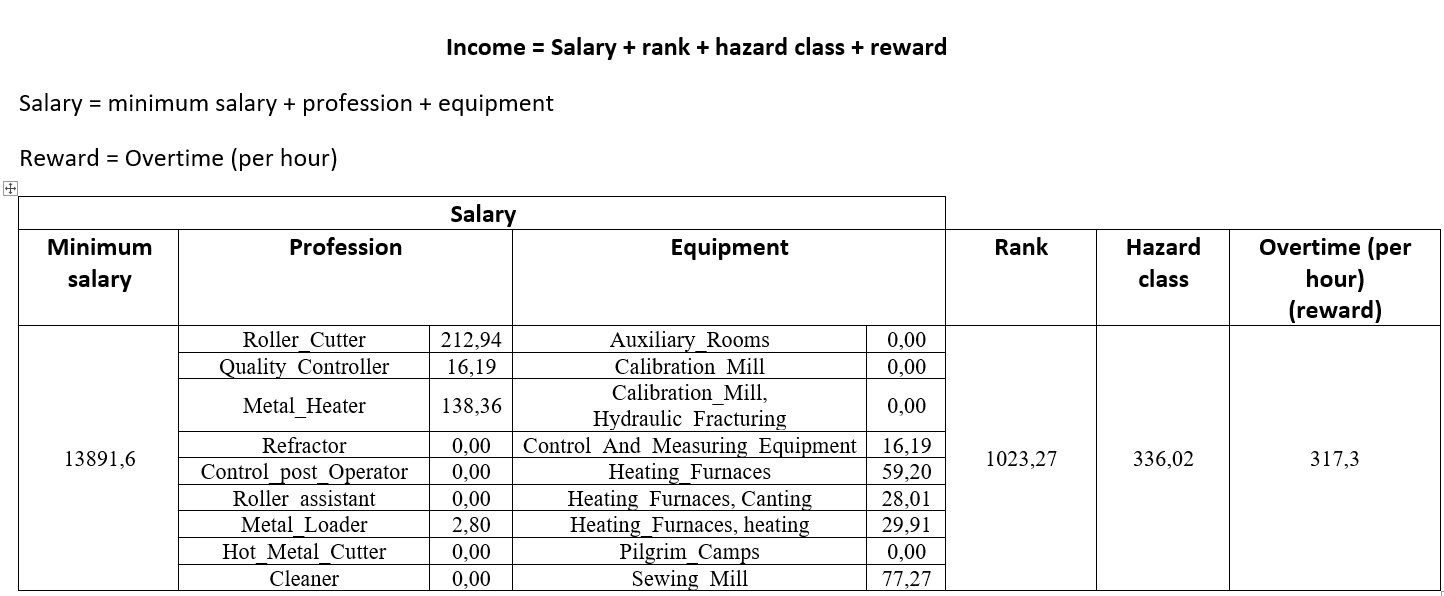